In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numexpr as ne

In [2]:
#Set the style of the following plots
plt.style.use("seaborn-v0_8-notebook")
plt.rcParams.update({
    "text.usetex": False, #colab does not like LaTeX
    "font.family": "Dejavu Sans"
})

### a)

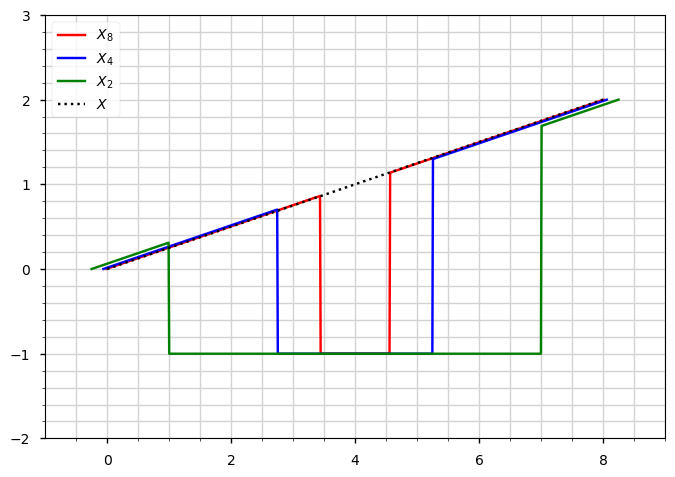

In [69]:
fig, ax  = plt.subplots()
plt.grid(visible=True, which="both", color="lightgray")

vals = np.linspace(-1, 9, 1000)

X = np.piecewise(vals, [(vals >= 0) * (vals <= 8)], [lambda x: 1/4*x, np.NaN])

X_n = lambda n: np.piecewise(vals,
                             [(vals > -1/(n*n)) * (vals < 4-4/n-4/(n*n)),
                              (vals == 4-4/n-4/(n*n)), # I tried to fix the fact that plt tries to plot the function as a continuos line but the exact point is sadly not hit by np.linspace()
                              (vals > 4-4/n-4/(n*n)) * (vals < 4+4/n+4/(n*n)),
                              (vals == 4+4/n+4/(n*n)),
                              (vals > 4+4/n+4/(n*n)) * (vals < 8 + 1/(n*n))],
                             [lambda x: 1/(4*n*n)+(1/4)*x, np.NaN, -1, np.NaN, lambda x: -1/(4*n*n)+(1/4)*x,np.NaN])
ax.plot(vals,X_n(8), color="red",label="$X_8$")
ax.plot(vals,X_n(4), color="blue",label="$X_4$")
ax.plot(vals,X_n(2), color="green",label="$X_2$")
ax.plot(vals,X, color="black", label="$X$", linestyle=':') # f_x
ax.set_xlim([-1, 9])
ax.set_ylim([-2,3])
ax.legend()
ax.minorticks_on();